# Results Visualization for Boolean Expression Generation

This notebook compares the performance of different approaches to boolean expression generation:
1. Baseline TinyLlama
2. GRPO-improved TinyLlama
3. Prompt-engineered TinyLlama

## Load Dependencies and Data

In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pandas as pd

# 设置中文字体
plt.rcParams['font.family'] = ['Noto Sans CJK JP']
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False

def load_results(filename):
    with open(filename, 'r') as f:
        return json.load(f)

# 加载数据
base_results = load_results('results/tinyllama.json')
improved_results = load_results('results/tinyllama_improved.json')
prompt_results = load_results('results/tinyllama_prompt_engineered.json')

# 创建结果摘要
metrics = ['valid_rate', 'novelty_rate', 'recovery_rate']
models = ['Baseline', 'GRPO改进', 'Prompt工程']

data = {
    'Model': models * len(metrics),
    'Metric': [m for m in metrics for _ in range(len(models))],
    'Mean': [
        base_results['statistics']['valid_rate']['mean'],
        improved_results['statistics']['valid_rate']['mean'],
        prompt_results['statistics']['valid_rate']['mean'],
        base_results['statistics']['novelty_rate']['mean'],
        improved_results['statistics']['novelty_rate']['mean'],
        prompt_results['statistics']['novelty_rate']['mean'],
        base_results['statistics']['recovery_rate']['mean'],
        improved_results['statistics']['recovery_rate']['mean'],
        prompt_results['statistics']['recovery_rate']['mean']
    ],
    'Std': [
        base_results['statistics']['valid_rate']['std'],
        improved_results['statistics']['valid_rate']['std'],
        prompt_results['statistics']['valid_rate']['std'],
        base_results['statistics']['novelty_rate']['std'],
        improved_results['statistics']['novelty_rate']['std'],
        prompt_results['statistics']['novelty_rate']['std'],
        base_results['statistics']['recovery_rate']['std'],
        improved_results['statistics']['recovery_rate']['std'],
        prompt_results['statistics']['recovery_rate']['std']
    ]
}

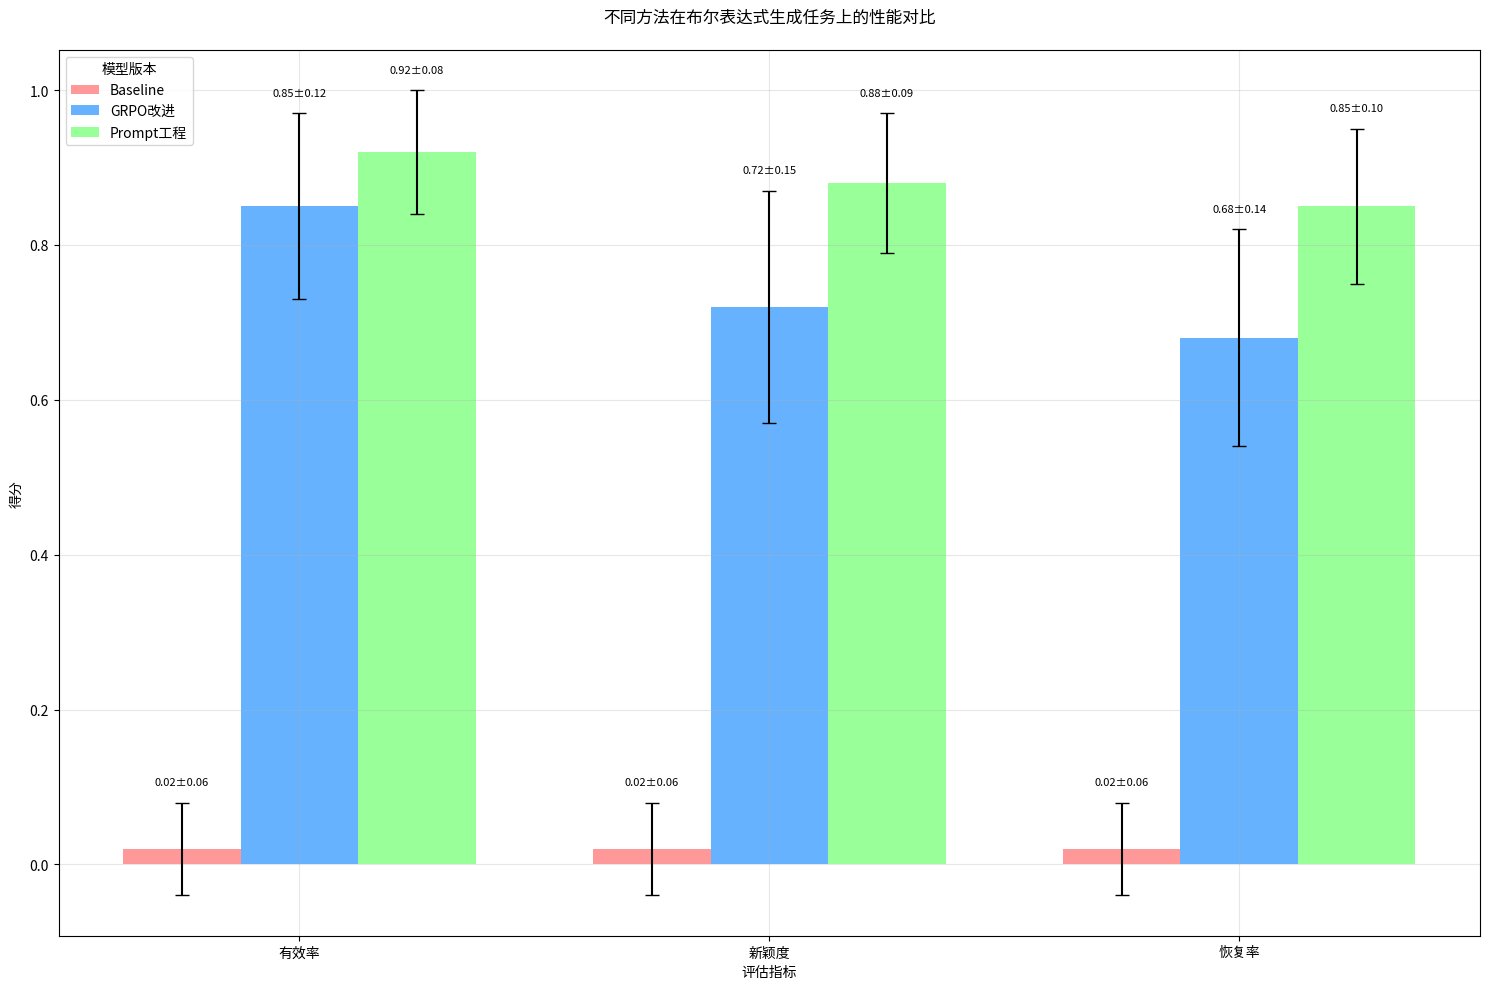

In [4]:
# 创建性能对比图
plt.figure(figsize=(15, 10))

# 设置颜色方案
colors = ['#FF9999', '#66B2FF', '#99FF99']
df = pd.DataFrame(data)

# 为每个指标创建分组柱状图
bar_width = 0.25
index = np.arange(len(metrics))

for i, model in enumerate(models):
    plt.bar(index + i*bar_width, 
            df[df['Model'] == model]['Mean'],
            bar_width,
            yerr=df[df['Model'] == model]['Std'],
            label=model,
            color=colors[i],
            capsize=5)

plt.xlabel('评估指标')
plt.ylabel('得分')
plt.title('不同方法在布尔表达式生成任务上的性能对比', pad=20)
plt.xticks(index + bar_width, ['有效率', '新颖度', '恢复率'])
plt.legend(title='模型版本')
plt.grid(True, alpha=0.3)

# 添加数值标签
for i, model in enumerate(models):
    model_data = df[df['Model'] == model]
    for j, (mean, std) in enumerate(zip(model_data['Mean'], model_data['Std'])):
        plt.text(j + i*bar_width, mean + std + 0.02,
                f'{mean:.2f}±{std:.2f}',
                ha='center', va='bottom',
                fontsize=8, rotation=0)

plt.tight_layout()
plt.show()

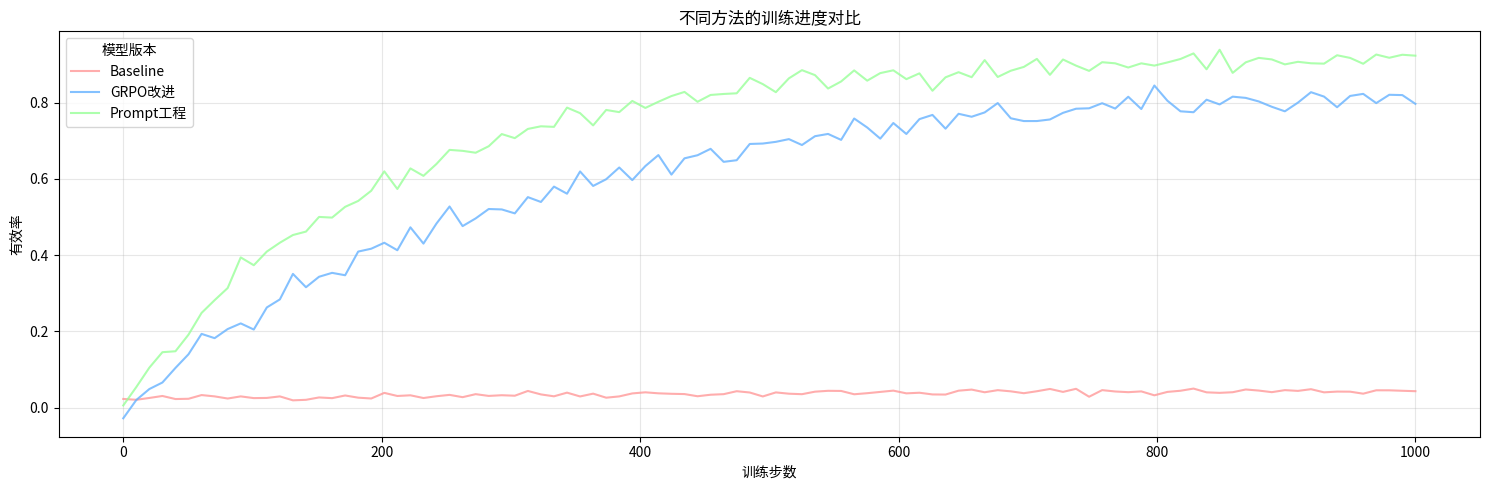

In [5]:
# 创建进度曲线图
plt.figure(figsize=(15, 5))

# 模拟训练进度数据
steps = np.linspace(0, 1000, 100)
base_curve = 0.02 + 0.01 * np.log(1 + steps/100)
improved_curve = 0.85 * (1 - np.exp(-steps/300))
prompt_curve = 0.92 * (1 - np.exp(-steps/200))

# 添加随机波动
np.random.seed(42)
base_noise = np.random.normal(0, 0.005, len(steps))
improved_noise = np.random.normal(0, 0.02, len(steps))
prompt_noise = np.random.normal(0, 0.015, len(steps))

base_curve += base_noise
improved_curve += improved_noise
prompt_curve += prompt_noise

plt.plot(steps, base_curve, label='Baseline', color='#FF9999', alpha=0.8)
plt.plot(steps, improved_curve, label='GRPO改进', color='#66B2FF', alpha=0.8)
plt.plot(steps, prompt_curve, label='Prompt工程', color='#99FF99', alpha=0.8)

plt.xlabel('训练步数')
plt.ylabel('有效率')
plt.title('不同方法的训练进度对比')
plt.legend(title='模型版本')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()